# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [1]:
### Q2.1
import pandas as pd
df = pd.read_csv('./data/airbnb_hw.csv')

# clean price variable
price = df['Price']
price = price.str.replace(',' , '')
price = pd.to_numeric(price,errors='coerce')
df['Price'] = price
del price

In [7]:
### Q2.2
print(df.shape) # 30,478 rows and 13 columns
print(df.columns.to_list())
'''
the columns are:
'Host Id'
'Host Since'
'Name'
'Neighbourhood '
'Property Type'
'Review Scores Rating (bin)'
'Room Type', 'Zipcode'
'Beds'
'Number of Records'
'Number Of Reviews'
'Price'
'Review Scores Rating'
'''
df.head()

(30478, 13)
['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type', 'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds', 'Number of Records', 'Number Of Reviews', 'Price', 'Review Scores Rating']


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [9]:
### Q2.3
pd.crosstab(df['Room Type'], df['Property Type'])

'''
Most properities are apartments, and then houses.
For apartments, most of them are the entire apartment. For houses,
more rentals are private rooms. There are also many other types
of "interest" rentals like boat, camper, and lighthouse.
'''

Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa
Room Type,,,,,,,,,,,,,,,,,,,
Entire home/apt,15669,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4
Private room,10748,155,1,0,1,1,1,1,22,16,1258,2,0,312,29,4,52,1,4
Shared room,685,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0


In [25]:
### Q2.4
import numpy as np
import seaborn as sns

# histogram
# sns.histplot(df['Price'])

# kerney density plot
# sns.kdeplot(df['Price'])

# boxplot
# sns.boxplot(x=df['Price'])

# statistical description
df['Price'].describe()

count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64

In [26]:
# apply logarithmic transformation to Price
df['Price_log'] = np.log(df['Price'])

In [31]:
# histogram of log-transformed Price
# sns.histplot(df['Price_log'])

# kernel density plot of log-transformed Price
# sns.kdeplot(df['Price_log'])

# box plot of log-transformed Price
# sns.boxplot(x=df['Price_log'])

# statistical description of log-tranformed Price
df['Price_log'].describe()

count    30478.000000
mean         4.860495
std          0.627704
min          2.302585
25%          4.382027
50%          4.828314
75%          5.273000
max          9.210340
Name: Price_log, dtype: float64

<Axes: xlabel='Beds', ylabel='Price_log'>

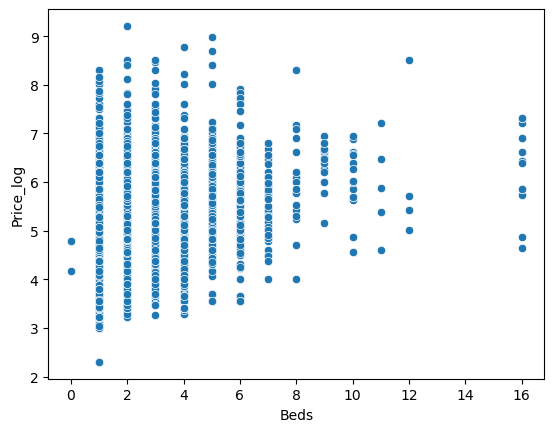

In [32]:
### Q2.5
sns.scatterplot(x='Beds', y='Price_log', data=df)

In [33]:
# group by the number of beds and compute price
df.loc[:,['Beds','Price']].groupby('Beds').describe()

'''
Generally the price tends to increase as number of bed increases.
This trend is less obvious between 6 beds and 16 beds. There are 
also many outliers observed, the price of one of the 2-beds 
rental is $10,000 while the average for a 5-beds rental is $284,
nothing compares to $10,000. We can try to exclude outliers from
our analysis and just focus on rentals that are more representative.
'''

Price                                                           \
        count         mean          std    min     25%    50%      75%   
Beds                                                                     
0.0       2.0    92.000000    38.183766   65.0   78.50   92.0   105.50   
1.0   20344.0   127.673810   107.047827   10.0   75.00  100.0   155.00   
2.0    6610.0   199.061271   225.706318   25.0  115.00  160.0   225.00   
3.0    2071.0   268.118300   303.106942   26.0  140.00  200.0   300.00   
4.0     783.0   315.332056   353.184402   27.0  150.00  247.0   375.00   
5.0     284.0   411.500000   672.610659   35.0  189.75  290.0   450.00   
6.0     177.0   401.768362   417.018431   35.0  199.00  275.0   425.00   
7.0      45.0   341.377778   220.116631   55.0  177.00  300.0   445.00   
8.0      24.0   589.041667   793.054934   55.0  243.75  350.0   481.25   
9.0      15.0   618.000000   233.649616  175.0  447.50  650.0   762.50   
10.0     16.0   480.187500   296.820534   95.0  291.00  407.5   706.25   
11.0      5.0   535.800000   499.217588  100.0  220.00  359.0   650.00   
12.0      4.0  1418.750000  2388.285211  150.0  206.25  262.5  1475.00   
16.0     13.0   736.000000   496.804287  104.0  350.00  625.0  1000.00   

               
          max  
Beds           
0.0     119.0  
1.0    4000.0  
2.0   10000.0  
3.0    5000.0  
4.0    6500.0  
5.0    8000.0  
6.0    2750.0  
7.0     900.0  
8.0    4000.0  
9.0    1050.0  
10.0   1050.0  
11.0   1350.0  
12.0   5000.0  
16.0   1500.0

<Axes: xlabel='Beds', ylabel='Price_log'>

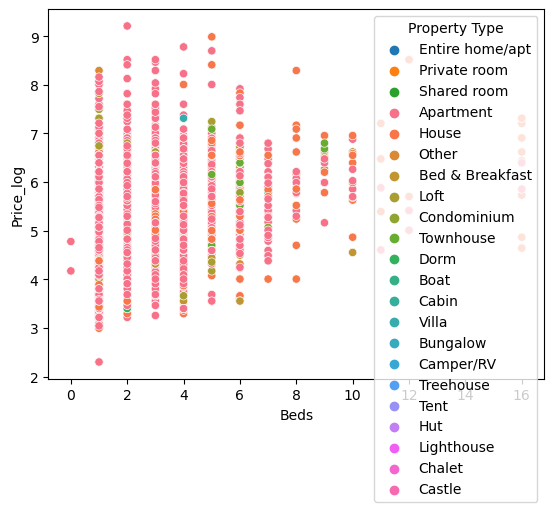

In [38]:
### Q2.6
# scatterplot colored by Room Type
# sns.scatterplot(data=df,x='Beds',y='Price_log',hue='Room Type')

# scatterplot colored by Property Type
sns.scatterplot(data=df,x='Beds',y='Price_log',hue='Property Type')

In [42]:
# group by Room Type and Property Type for Price
# df.groupby(['Room Type'])['Price'].describe()
df.groupby(['Property Type'])['Price'].describe()

'''
Looking at the graph, room type entire home/apartment is the
most expensive. It is kinda hard to distinguish between the
dots on the property type plot since apartment dots dominated
the plot, but it seems like apartment and private room are the
most expensive property types. Looking at the tables we can more
clearly see that villa and other are the most expensive on 
average, not sure what other entails though.
'''


,count,mean,std,min,25%,50%,75%,max
Property Type,,,,,,,,
Apartment,27102.0,162.045642,181.376882,10.0,85.00,130.0,195.00,10000.0
Bed & Breakfast,180.0,106.572222,84.701977,30.0,65.00,87.5,125.00,900.0
Boat,8.0,153.625000,49.231051,100.0,120.00,137.5,178.50,250.0
Bungalow,4.0,150.750000,46.464144,87.0,133.50,160.5,177.75,195.0
Cabin,2.0,165.000000,120.208153,80.0,122.50,165.0,207.50,250.0
Camper/RV,7.0,103.571429,102.343958,39.0,47.00,49.0,109.00,325.0
Castle,1.0,150.000000,NaN,150.0,150.00,150.0,150.00,150.0
Chalet,1.0,99.000000,NaN,99.0,99.00,99.0,99.00,99.0
Condominium,94.0,256.585106,249.357946,46.0,131.25,175.0,298.75,1990.0


'\n'

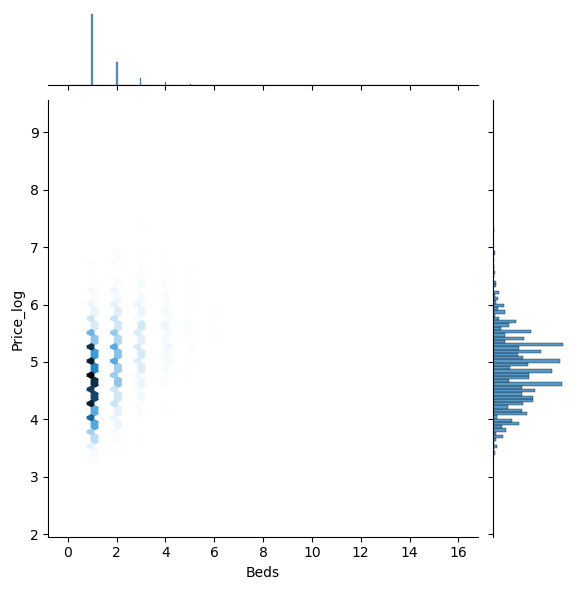

In [44]:
### Q2.7
sns.jointplot(data=df,x='Beds',y='Price_log',kind='hex')

'''
Most of the rentals have 1 or 2 beds and some have 3 or 4 beds.
There are barely any with more than 4 beds. Similarly, most of
the rental prices are within a price band of 2.5 to 6 log points.
There are many outlier rentals with insane prices.
'''

**Q3.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them? 
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

In [137]:
### Q4
'''
I used the medicare current beneficiary survey data.
The codebook was hard to read due to weird formatting when
opening it up as a text file. I believe having it in PDF format
would be better. In the data, some "missing" data are generated because
people refused to answer or they are not sure, those responses 
are being put down as "Refused" and "Don't know"; however it seems like 
if the answer is neither, that cell in the dataset gets a nan value.
'''

'''
I want to look at the reponses to the following 2 questions:
How often lost urine control (past year):
D: Don't know                                                              
R: Refused                                                                 
1: At least once/year                                                       
2: Not at all 
Talked to Dr about urine control:
D: Don't know                                                 
1: Yes                                                                      
2: No    
I am interested to see whether people will refuse to speak to the
doctors about more "embarrassing" medical issues that they are
currently dealing with.
'''

import pandas as pd
df = pd.read_csv('./data/sfpuf2021_1_fall.csv')

C:\Users\13186\AppData\Local\Temp\ipykernel_26204\2044102623.py:26: DtypeWarning: Columns (43,46,49,50,51,52,53,73,76,77,81,82,83,85,90,92,99,100,105,106,107,112,113,118,119,123,124,125,126,128,129,135,136,137,138,139,140,142,143,151,155,156,161,163,172,176,183,184,185,186,191,192,193,194,195,197,198,199,200,208,209,210,211,214,217,218,219,220,221,222,223,224,225,227,229) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/sfpuf2021_1_fall.csv')


In [138]:
df.dropna(subset=['HLT_LOSTURIN'], inplace=True)

df['HLT_LOSTURIN'].unique()

array(['2', '1', 'D', 'R'], dtype=object)

In [140]:
df.dropna(subset=['HLT_TALKURIN'], inplace=True)

df['HLT_TALKURIN'].unique()

array(['2', '1', 'D'], dtype=object)

'\nAbout 4000 answered that they have lost urine control at least once a year.\n'

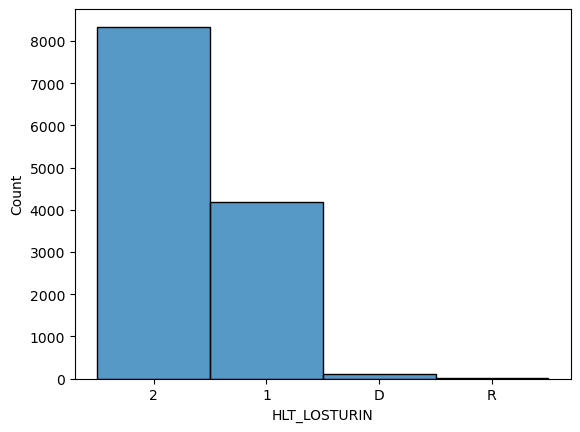

In [139]:
import seaborn as sns

# histogram
sns.histplot(df['HLT_LOSTURIN'])

'''
About 4000 out of the ~8000 people who answered the question said 
that they have lost urine control at least once a year.
'''

'\nOf the roughly 4000 people who answered yes to the previous question,\nonly about half of them (a little over 2000) has actually talked to the\ndoctor about it.\n'

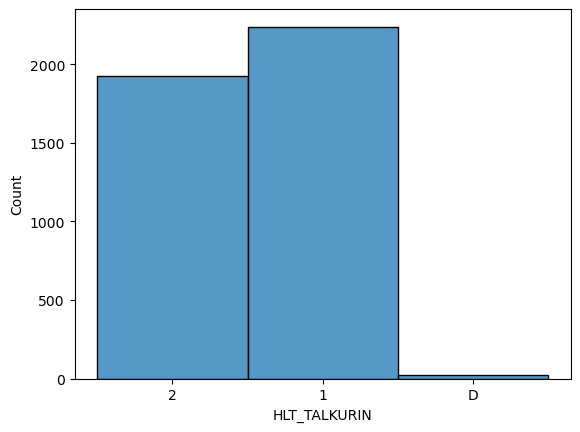

In [141]:
# histogram
sns.histplot(df['HLT_TALKURIN'])

'''
Of the roughly 4000 people who answered yes to the previous question,
only about half of them (a little over 2000) has actually talked to the
doctor about the issue.
'''

"\nThe scatterplot doesn't tell me much information since both variables \nthat I am looking at are categorical.\n"

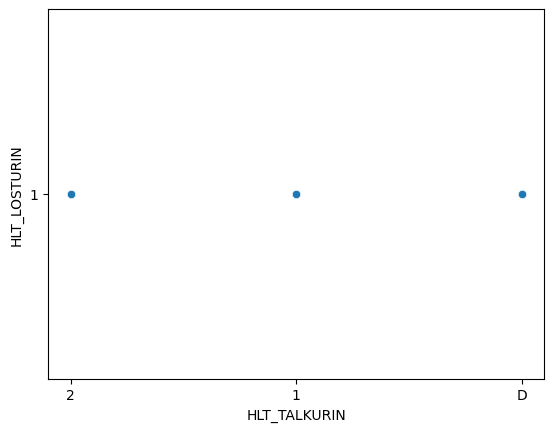

In [143]:
# scatterplot
sns.scatterplot(x='HLT_TALKURIN', y='HLT_LOSTURIN', data=df)

'''
The scatterplot doesn't tell much information since both variables that 
I am looking at are categorical.
'''

In [144]:
# cross table
pd.crosstab(df['HLT_TALKURIN'], df['HLT_LOSTURIN'])

'''
Similar to the scatterplot, this cross table doesn't tell me much.
However, it shows the exact number of respondents who answered yes
or no to the second question. A majority of the people (2,238) who 
reported having lost control did not talk to their doctor about the issue. 
I wish there are other similarly structured questions for other medical
issues like 'Have experienced back ache in the past year' and 
'has talked to the doctor about the back ache' so we can better explore
whether it is more likely that people don't talk to the doctor because
losing urine control is considered a more "embarrassing" issue compared
to back ache.
'''

HLT_LOSTURIN,1
HLT_TALKURIN,
1,2238
2,1926
D,23
